<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/9_visualising_2D_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising-2D-distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df = pd.read_csv("meteorite-landings.csv")
df.head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [3]:
df = df.dropna(subset=["reclat","reclong"])
df = df[df.reclong < 300]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38400 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38400 non-null  object 
 1   id           38400 non-null  int64  
 2   nametype     38400 non-null  object 
 3   recclass     38400 non-null  object 
 4   mass         38282 non-null  float64
 5   fall         38400 non-null  object 
 6   year         38225 non-null  float64
 7   reclat       38400 non-null  float64
 8   reclong      38400 non-null  float64
 9   GeoLocation  38400 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


## 2D Histograms

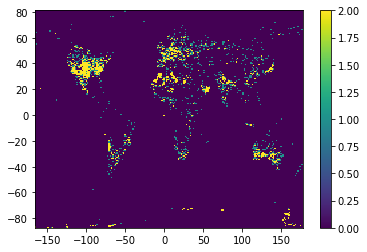

In [5]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=2)
plt.colorbar();

## 2D Hex plots

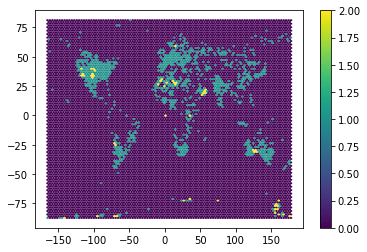

In [6]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=2, lw=0.0)
plt.colorbar();

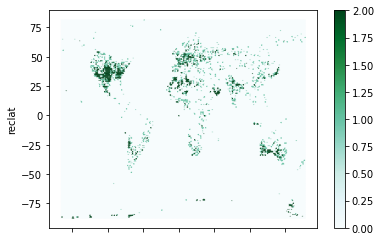

In [7]:
df.plot.hexbin(x="reclong",y="reclat", vmax=2, gridsize=200, linewidth=0.25);

## Contour

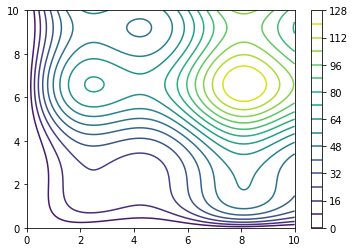

In [8]:
spacing = np.linspace(0, 10, 200)

X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2 

plt.contour(X,Y,Z, levels=20)
plt.colorbar();


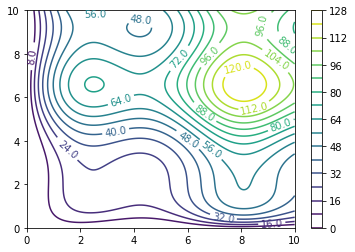

In [9]:
c = plt.contour(X,Y,Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();


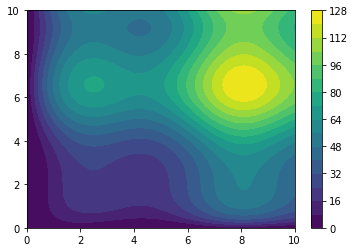

In [10]:
c = plt.contourf(X,Y,Z, levels=20)
plt.colorbar();

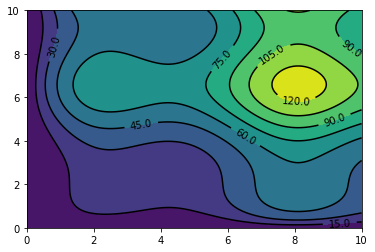

In [11]:
c = plt.contourf(X,Y,Z, levels=10)
c = plt.contour(X,Y,Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");


## KDE

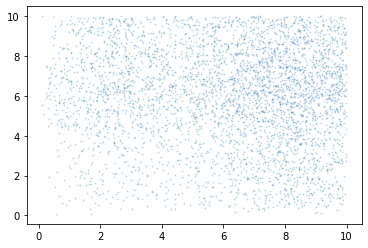

In [12]:
# Rejection sampling
n = 10000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) <zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

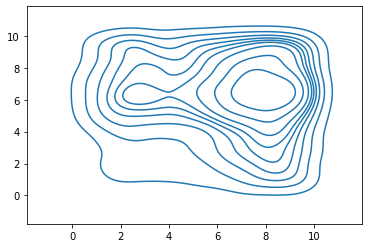

In [13]:
sb.kdeplot(x=xs, y=ys);

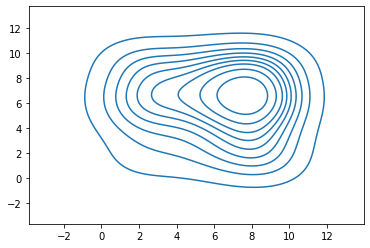

In [14]:
sb.kdeplot(x=xs, y=ys, bw_adjust=2);

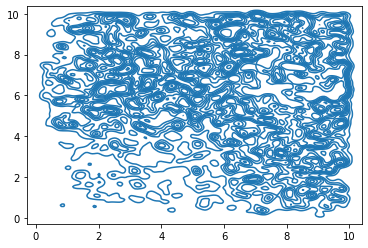

In [15]:
sb.kdeplot(x=xs, y=ys, bw_adjust=0.2);

# Jointplots

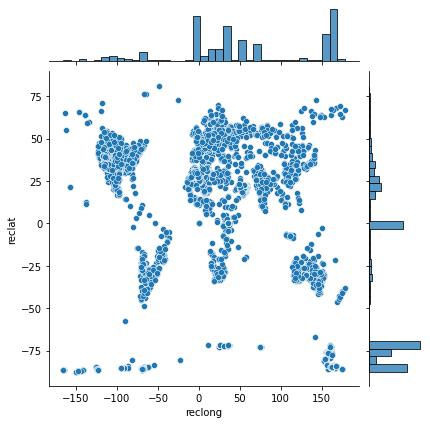

In [16]:
sb.jointplot(data=df, x="reclong", y="reclat");

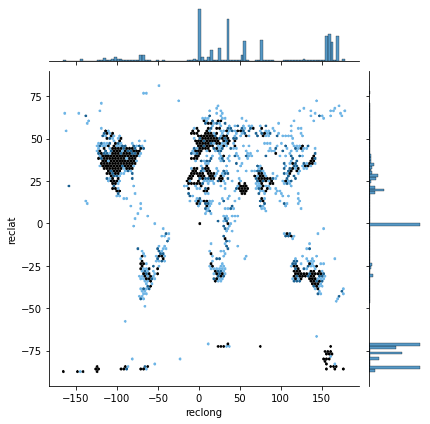

In [17]:
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

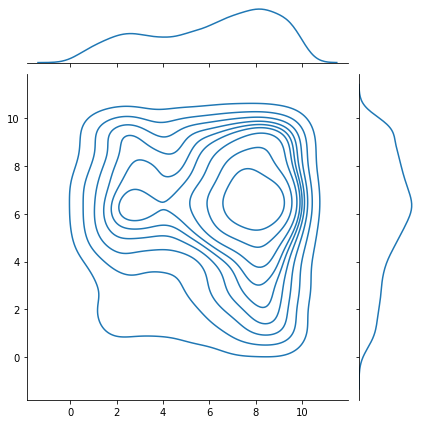

In [18]:
sb.jointplot( x=xs, y=ys , kind="kde");

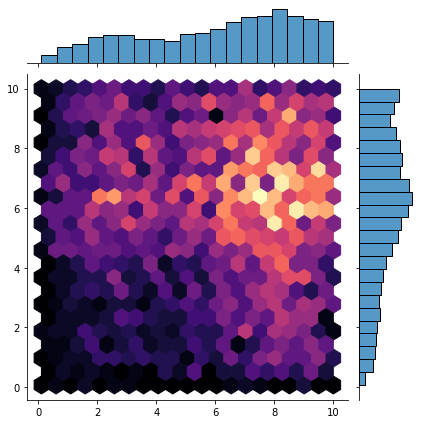

In [19]:
sb.jointplot( x=xs, y=ys , kind="hex", gridsize=20, cmap="magma");

# Pairplot

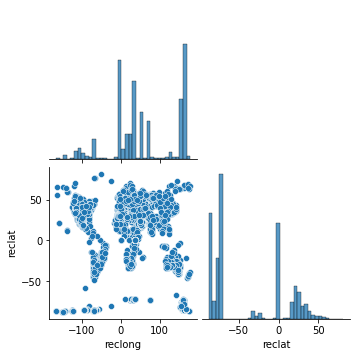

In [20]:
sb.pairplot(data=df[["reclong","reclat"]],  corner=True);